In [83]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = pd.read_csv('loan_data.csv')
data

print("Dataset length :",len(data))
print("Dataset shape :",data.shape)

Dataset length : 614
Dataset shape : (614, 13)


In [84]:
print("Dataset ::")
data.head()

Dataset ::


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [85]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [86]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mean(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3788\948991767.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_3788\948991767.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [87]:
#Adding a new column to our dataset 
data['TotalIncome'] = data['ApplicantIncome']+data['CoapplicantIncome']
data.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
dtype: int64

In [88]:
X=data[["ApplicantIncome",'CoapplicantIncome','LoanAmount',"Credit_History"]]
y =data['Loan_Status']

In [89]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.842199,7024.705081
std,6109.041673,2926.248369,84.180967,64.428629,0.349681,6458.663872
min,150.000000,0.000000,9.000000,12.000000,0.000000,1442.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,4166.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000,5416.500000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,7521.750000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,81000.000000


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create an instance of the Decision Tree model and fit it to the training dat
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


#Use the model to make predictions for one person.
ApplicantIncome = int(input("From 1-81000, Type ApplicantIncome :"))
CoapplicantIncome = int(input("From 1-41000, Type CoapplicantIncome :"))
TotalIncome = ApplicantIncome + CoapplicantIncome
LoanAmount = int(input("From 0-700, Type LoanAmount :"))
Credit_History = float(input("From 0.0-1.0 {0for new clinet & 1 for old clients}, Type Credit_History :"))

predictions = model.predict([[ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History]])
predictions


From 1-81000, Type ApplicantIncome : 20000
From 1-41000, Type CoapplicantIncome : 10000
From 0-700, Type LoanAmount : 100
From 0.0-1.0 {0for new clinet & 1 for old clients}, Type Credit_History : 1.0


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Y'], dtype=object)

In [91]:
#Use the model to make predictions for the people in our dataset
predictions = model.predict(X_test)
predictions

array(['Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N'], dtype=object)

In [92]:
#Evaluate the Model
#Evaluate the model's performance using metrics like accuracy, confusion matrix, and classification report.
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(f'Model Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Model Accuracy: 0.6504065040650406
Confusion Matrix:
 [[23 20]
 [23 57]]
Classification Report:
               precision    recall  f1-score   support

           N       0.50      0.53      0.52        43
           Y       0.74      0.71      0.73        80

    accuracy                           0.65       123
   macro avg       0.62      0.62      0.62       123
weighted avg       0.66      0.65      0.65       123



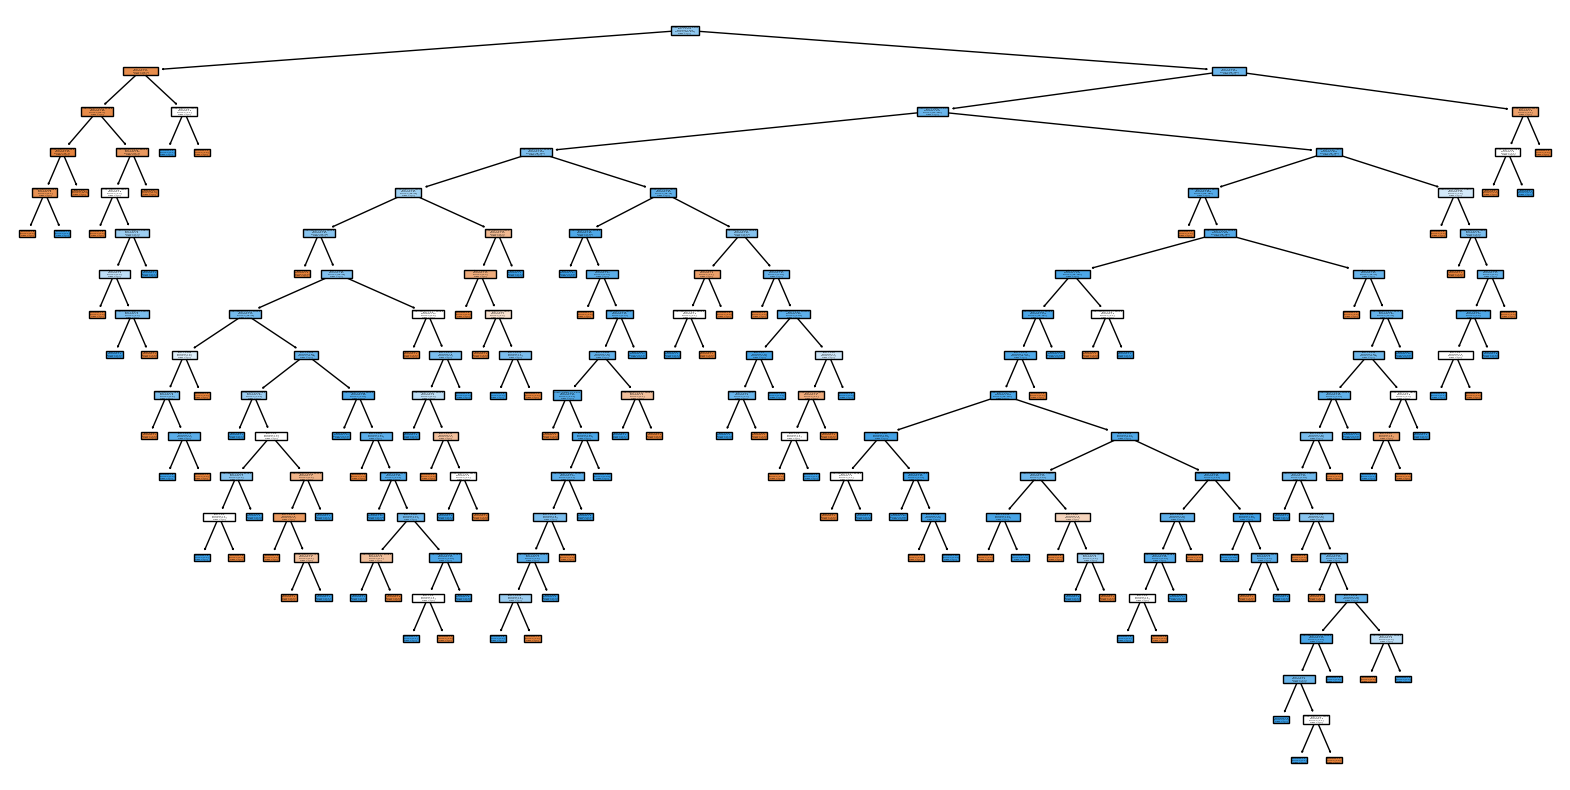

In [93]:
#Visualize the Tree
#You can visualize the decision tree using matplotlib and sklearn.tree.plot_tree.
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=True, filled=True)
plt.show()